In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from pandas_profiling import ProfileReport

In [3]:
response = requests.get("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
response

<Response [200]>

In [4]:
response = response.content.decode("utf-8")
result = [x.split(',') for x in response.split('\n')]
df = pd.DataFrame(result[1:], columns= result[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   epi_week                               27259 non-null  object
 1   date                                   27258 non-null  object
 2   country                                27258 non-null  object
 3   state                                  27258 non-null  object
 4   city                                   27258 non-null  object
 5   newDeaths                              27258 non-null  object
 6   deaths                                 27258 non-null  object
 7   newCases                               27258 non-null  object
 8   totalCases                             27258 non-null  object
 9   deathsMS                               27258 non-null  object
 10  totalCasesMS                           27258 non-null  object
 11  deaths_per_100k

In [6]:
df.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,,,,,,,,,,
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,,,,,,,,,,
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,,,,,,,,,,
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,,,,,,,,,,
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,,,,,,,,,,


> Apesar de aparentar não existirem valores nulos, percebemos que existem muitas células vazias na base de dados. Esses valores foram preenchidos por "0", por indicarem a ausência de casos.

## Data Cleaning

In [7]:
# Substituindo os valores vazios por Nan:
df = df.replace("", 0, regex=True)

In [8]:
#  Removendo colunas com valores constantes:
df.drop(["country", "city"], axis=1, inplace=True)
df = df[:-1]

In [9]:
# Transformando a coluna de data para o formato apropriado:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [10]:
# Como a maioria das colunas está em um formato numérico, vamos converter elas para float:
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        continue

In [11]:
# Colocando as semanas epidemiológicas na ordem direta:
for row in df.index:
    if df["epi_week"][row] > 200:
        df["epi_week"][row] = (df["epi_week"][row]-200+105)
    elif df["epi_week"][row] > 100:
        df["epi_week"][row] = (df["epi_week"][row]-100+53)

C:\Users\tiago\AppData\Local\Temp\ipykernel_21032\2501768556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["epi_week"][row] = (df["epi_week"][row]-100+53)
C:\Users\tiago\AppData\Local\Temp\ipykernel_21032\2501768556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["epi_week"][row] = (df["epi_week"][row]-200+105)


In [115]:
df.head()

,epi_week,date,state,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9.0,2020-02-25,SP,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,2020-02-25,TOTAL,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,2020-02-26,SP,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,2020-02-26,TOTAL,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,2020-02-27,SP,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.columns

Index(['epi_week', 'date', 'state', 'newDeaths', 'deaths', 'newCases',
       'totalCases', 'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants',
       'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'recovered',
       'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

## Data Visualization

<AxesSubplot:title={'center':'Registro de Novos Casos de Covid no Brasil'}, xlabel='date'>

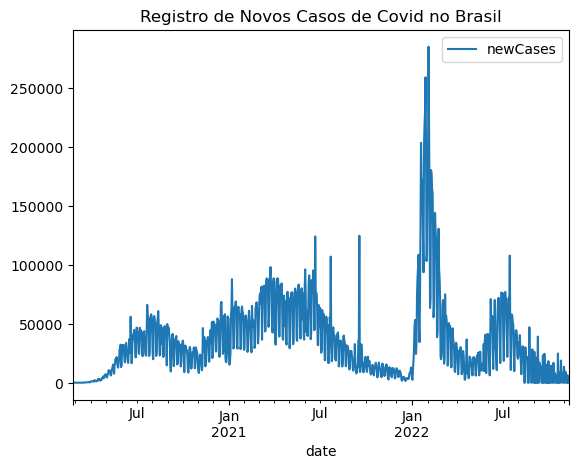

In [14]:
df[df["state"]=="TOTAL"].plot(x="date", y=["newCases"], title = "Registro de Novos Casos de Covid no Brasil")

<AxesSubplot:title={'center':'Registro de Mortes por Covid no Brasil'}, xlabel='date'>

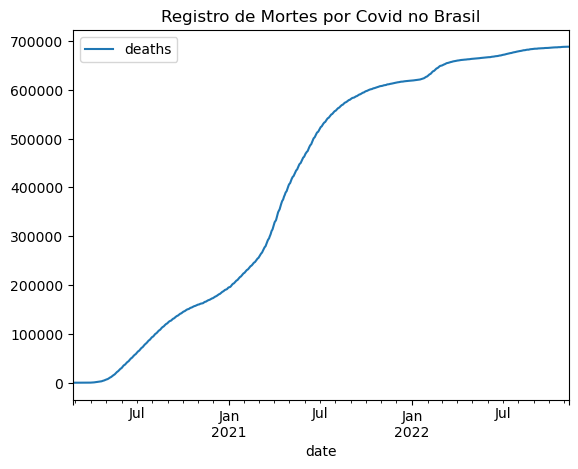

In [15]:
df[df["state"]=="TOTAL"].plot(x="date", y=["deaths"], title = "Registro de Mortes por Covid no Brasil")

<AxesSubplot:title={'center':'Registro de Pessoas Vacinadas Contra Covid no Brasil'}, xlabel='date'>

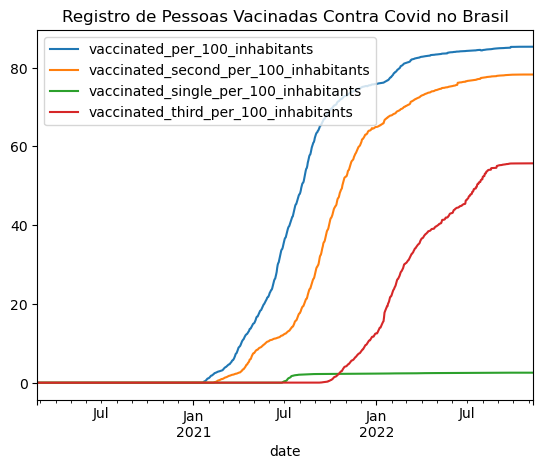

In [16]:
df[df["state"]=="TOTAL"].plot(x="date", \
                              y=["vaccinated_per_100_inhabitants", "vaccinated_second_per_100_inhabitants", \
                                "vaccinated_single_per_100_inhabitants", "vaccinated_third_per_100_inhabitants"], \
                              title = "Registro de Pessoas Vacinadas Contra Covid no Brasil")

<AxesSubplot:title={'center':'Registro de Casos Totais, Testes, Falecimentos e Recuperações'}, xlabel='date'>

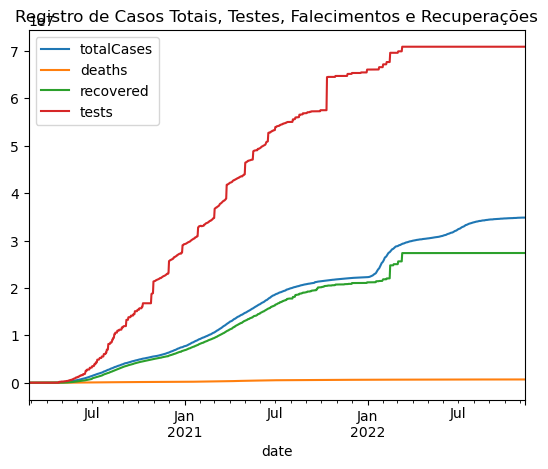

In [17]:
df[df["state"]=="TOTAL"].plot(x="date", \
                              y=["totalCases", "deaths", "recovered", "tests"], \
                              title = "Registro de Casos Totais, Testes, Falecimentos e Recuperações")

In [18]:
cases_brazil = df.loc[df["state"]=="TOTAL"]
cases_brazil.head()

,epi_week,date,state,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
1,9.0,2020-02-25,TOTAL,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,2020-02-26,TOTAL,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.0,2020-02-27,TOTAL,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9.0,2020-02-28,TOTAL,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9.0,2020-02-29,TOTAL,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#profile = ProfileReport(cases_brazil.reset_index(drop=True), title="Relatório Covid Brasil", explorative = True)
#profile

## Obtendo o IPCA do período

Base de dados disponível em:

<https://dadosabertos.bcb.gov.br/dataset/4449-indice-nacional-de-precos-ao-consumidor-amplo-ipca---precos-monitorados---total>

In [91]:
ipca = requests.get("https://api.bcb.gov.br/dados/serie/bcdata.sgs.4449/dados?formato=csv")
ipca

<Response [200]>

In [92]:
ipca = ipca.content.decode("utf-8")
ipca = [x.split(';') for x in ipca.split('\r\n')]

In [93]:
# Removendo as aspas ("") prensentes em cada item do dataframe:
for row in range(0, len(ipca)):
    for item in range(0, len(ipca[row])):
        ipca[row][item] = ipca[row][item].replace('\"', "")

In [94]:
ipca_df = pd.DataFrame(ipca[1:], columns= ipca[0])

In [96]:
# Removendo a última linha, que possui valores nulos:
ipca_df = ipca_df[:-1]

In [105]:
# Colocando a data no formato datetime:
ipca_df["data"] = pd.to_datetime(ipca_df["data"], format="%d/%m/%Y")

C:\Users\tiago\AppData\Local\Temp\ipykernel_21032\3196421378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_df["data"] = pd.to_datetime(ipca_df["data"], format="%d/%m/%Y")


In [110]:
# Trocando os pontos por vírgulas:
ipca_df["valor"] = [x.replace(",", ".") for x in ipca_df["valor"]]

C:\Users\tiago\AppData\Local\Temp\ipykernel_21032\3588582564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_df["valor"] = [x.replace(",", ".") for x in ipca_df["valor"]]


In [111]:
# Colocando o valor no formato float:
ipca_df["valor"] = ipca_df["valor"].astype(float)

C:\Users\tiago\AppData\Local\Temp\ipykernel_21032\433186756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_df["valor"] = ipca_df["valor"].astype(float)


In [123]:
# Separando um dataframe para analizar o IPCA entre 2020 e os dias atuais:
ipca_covid_df = ipca_df.loc[ipca_df["data"]>"2020-01-01"]

In [124]:
ipca_covid_df

,data,valor
337,2020-02-01,-0.28
338,2020-03-01,-0.22
339,2020-04-01,-2.06
340,2020-05-01,-1.02
341,2020-06-01,0.89
342,2020-07-01,1.23
343,2020-08-01,0.78
344,2020-09-01,0.13
345,2020-10-01,0.23
346,2020-11-01,0.41


<AxesSubplot:title={'center':'Variação do IPCA no Brasil'}, xlabel='data'>

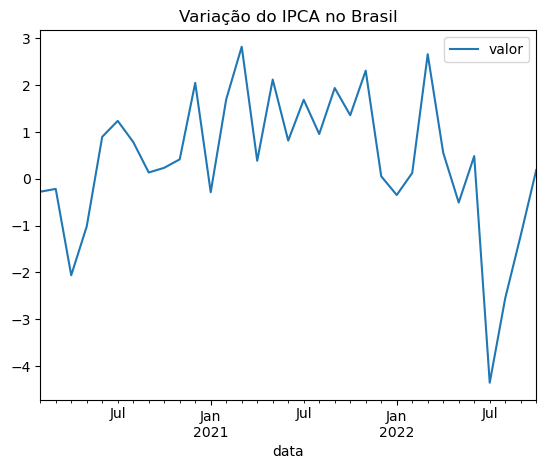

In [126]:
ipca_covid_df.plot(x="data", y=["valor"], title = "Variação do IPCA no Brasil")

### Séries Históricas de preços de Combuistíveis
<https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda>

## Ibovespa
<https://br.investing.com/indices/bovespa-historical-data>

## Ibovespa em Dolar

<https://br.investing.com/indices/ibovespa-usd-historical-data>